In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
path = '/Users/hughlupson/code/realGhostFoxx/droughts_modelling/droughts_modelling/data/'

In [2]:
data_train = pd.read_csv(os.path.join(path+'train_timeseries.csv'))
data_validation = pd.read_csv(os.path.join(path+'validation_timeseries.csv'))
data_test = pd.read_csv(os.path.join(path+'test_timeseries.csv'))

In [3]:
cols = [c for c in data_train.columns if c not in ['fips','date','score']]

cols1 = cols[:6]
cols2 = cols[6:12]
cols3 = cols[12:18]
all_cols = [cols1,cols2,cols3]

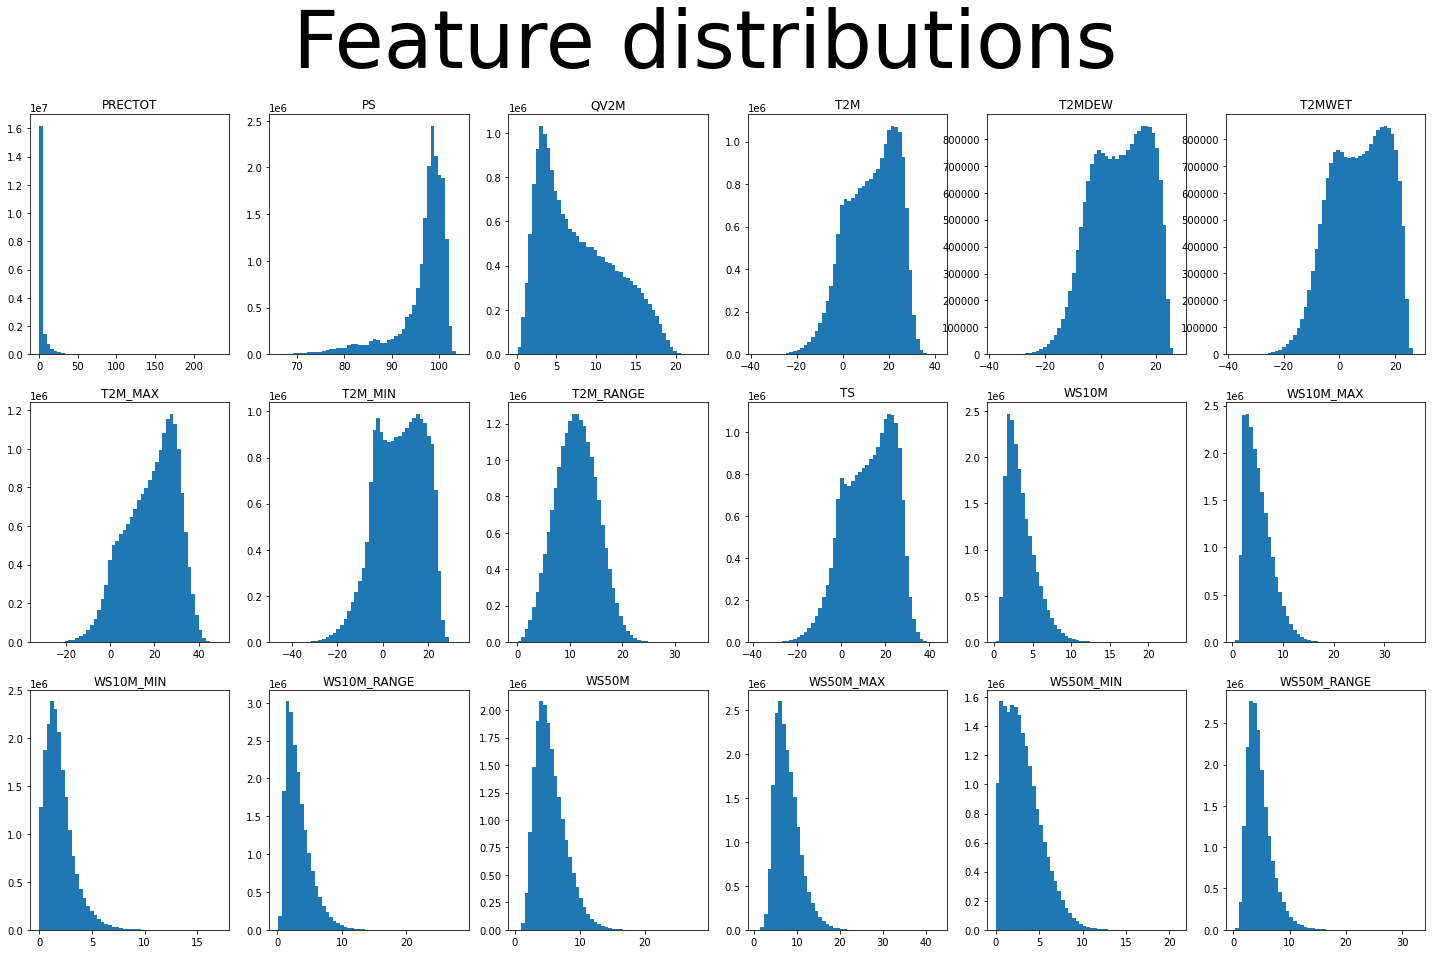

In [4]:
fig, axs = plt.subplots(3,6,figsize=(25,15))
fig.suptitle('Feature distributions',size=80)
for index, col_list in enumerate(all_cols):
    for index1, col in enumerate(col_list):
        axs[index,index1].hist(data_train[col],bins=50)
        axs[index,index1].set_title(col)

<AxesSubplot:>

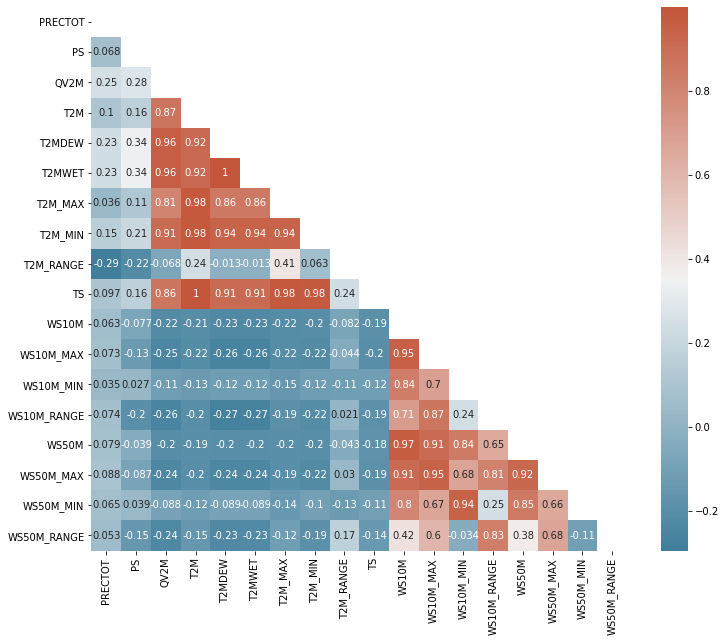

In [5]:
corr = data_train.drop(columns=['fips','date','score']).corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<AxesSubplot:xlabel='feature', ylabel='sigma'>

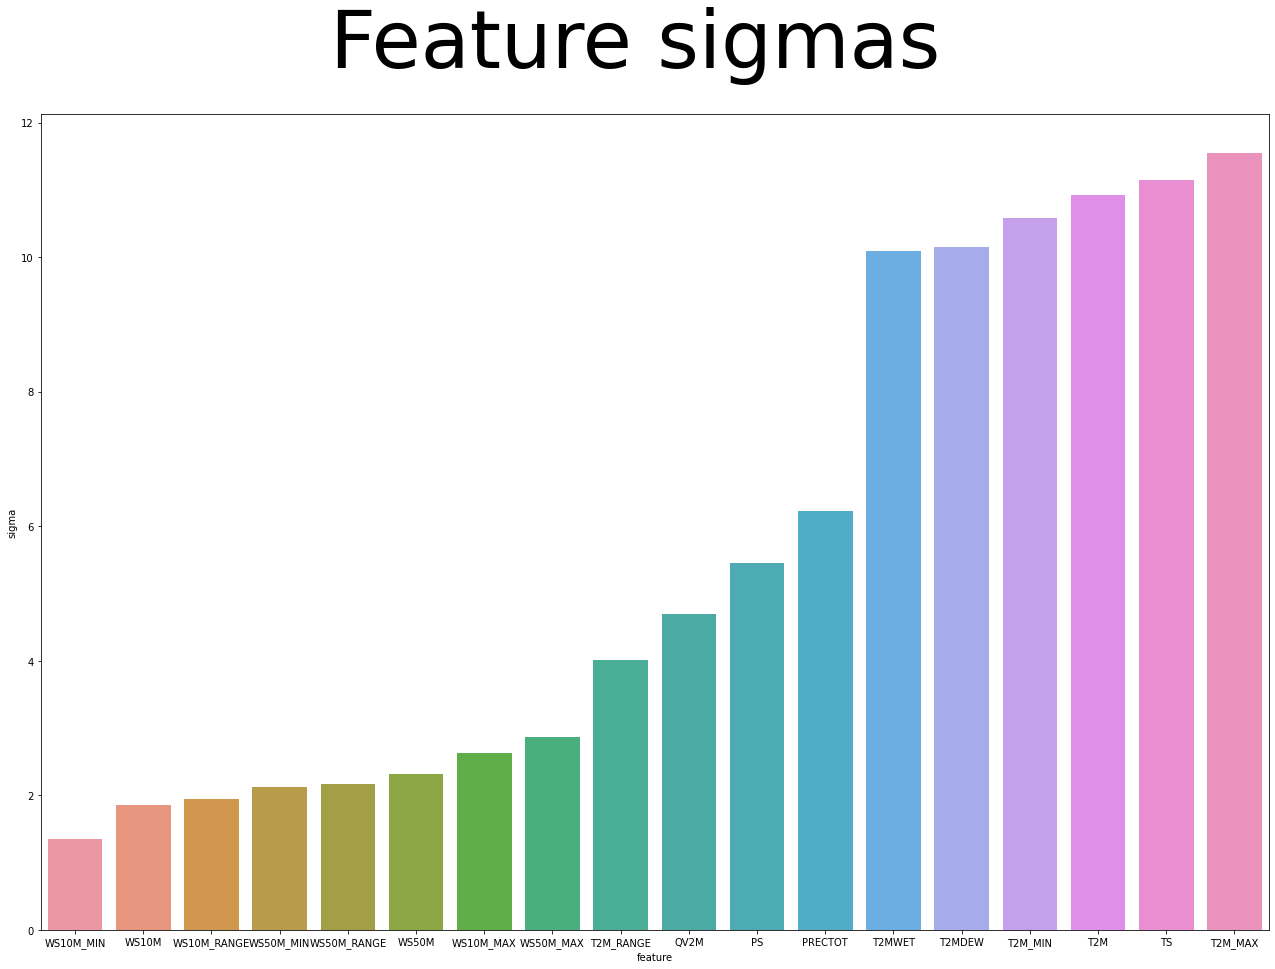

In [6]:
sigmas = pd.DataFrame(columns=['feature','sigma'])
for c in cols:
    sigma = data_train[c].std()
    feature = c
    sigmas = sigmas.append({'feature':feature,'sigma':sigma},ignore_index=True).sort_values('sigma')
    
fig,axs = plt.subplots(figsize=(22,15))
fig.suptitle('Feature sigmas',size=80)
sns.barplot(x='feature',y='sigma',data=sigmas)

In [7]:
data_train[['date','score']]

,date,score
0,2000-01-01,NaN
1,2000-01-02,NaN
2,2000-01-03,NaN
3,2000-01-04,1.0
4,2000-01-05,NaN
...,...,...
19300675,2016-12-27,0.0
19300676,2016-12-28,NaN
19300677,2016-12-29,NaN
19300678,2016-12-30,NaN


In [8]:
#Function to plot average drought fluctuation over 16 year period for individual county

def drought_fluctuation(county):
    
    fluctuation = pd.DataFrame(columns=['year','average_drought_score'])
    intevals = list(range(0,len(data_train[data_train['fips'] == county]),366))
    
    if county in data_train['fips'].unique():
        for inteval in intevals:
            date = data_train[data_train['fips'] == county]['date'].iloc[inteval][:4]
            average_drought_score = data_train[data_train['fips'] == county]['score'].iloc[inteval:(inteval+366)].mean()
            fluctuation = fluctuation.append({'year':date,'average_drought_score':average_drought_score},ignore_index=True)

        fig, axs = plt.subplots(figsize=(25,17))
        fig.suptitle(f'County no.{county}: 2000 - 2016 drought fluctuation',size=50)
        axs.grid()
        sns.lineplot(x='year',y='average_drought_score',data=fluctuation)
    
    else:
        print('Not a valid county')
        
        

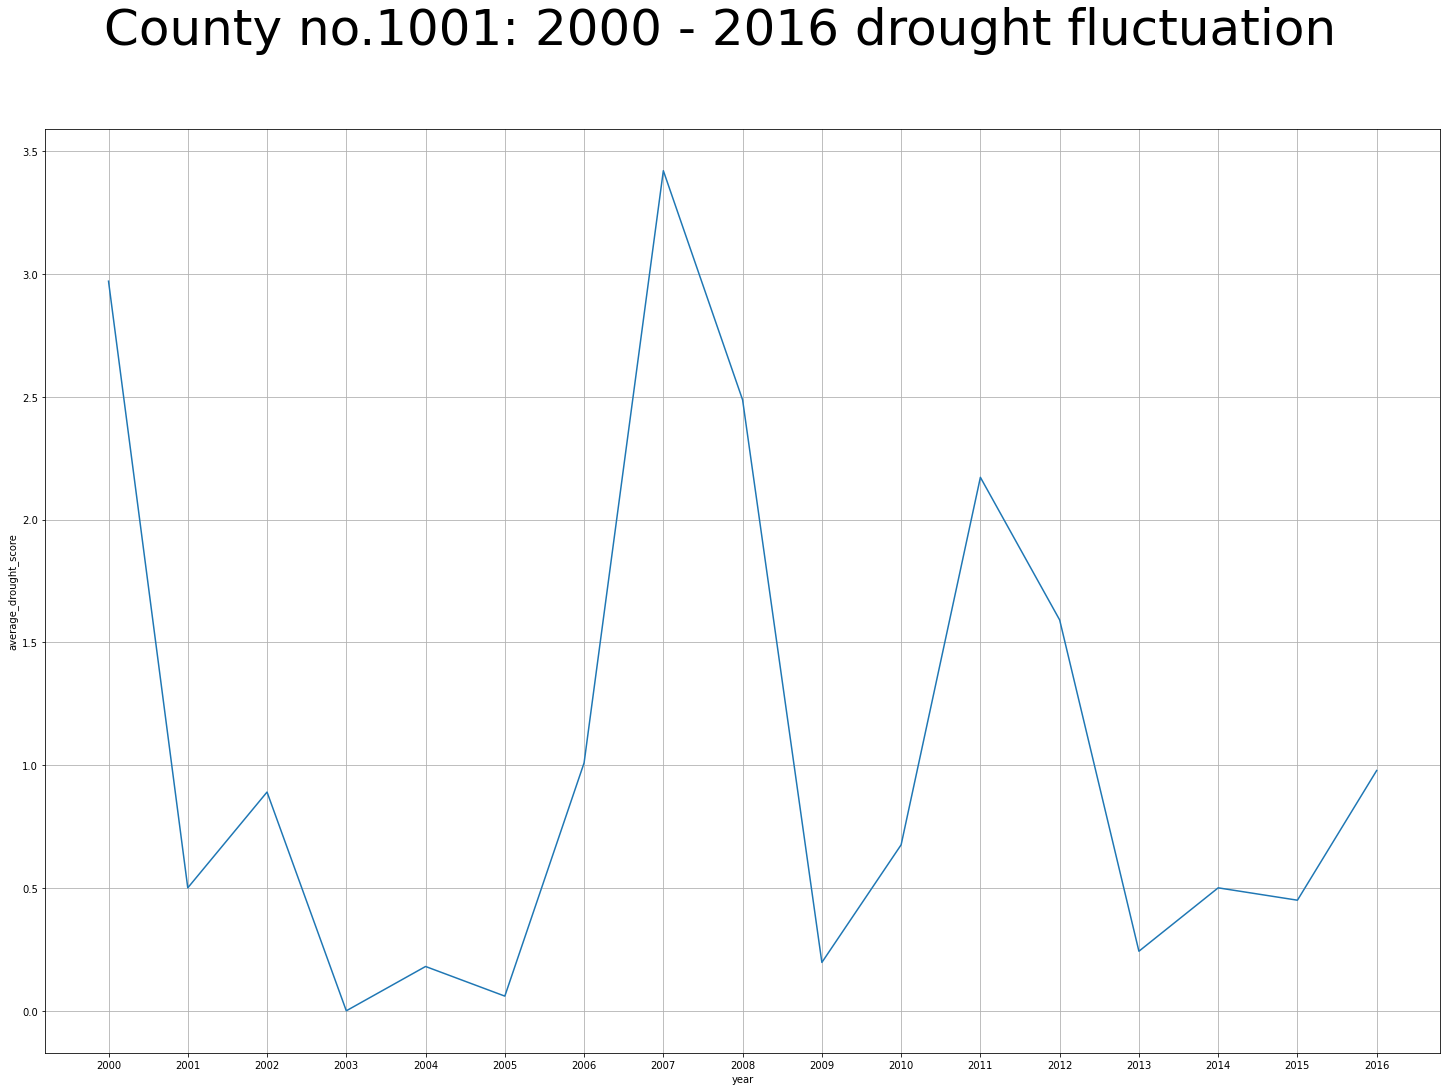

In [9]:
drought_fluctuation(1001)

In [10]:
#function to return drought stats for each county on year by year basis

def drought_stats(county):
    intevals = list(range(0,len(data_train[data_train['fips'] == county]),366))
    stats = pd.DataFrame(columns=['year','yearly_min','yearly_max','yearly_mean','yearly_std'])
    
    if county in data_train['fips'].unique():
        for inteval in intevals:
            date = data_train[data_train['fips'] == county]['date'].iloc[inteval]
            yearly_min = data_train[data_train['fips'] == county]['score'].iloc[inteval:(inteval+365)].min()
            yearly_max = data_train[data_train['fips'] == county]['score'].iloc[inteval:(inteval+365)].max()
            yearly_mean = data_train[data_train['fips'] == county]['score'].iloc[inteval:(inteval+365)].mean()
            yearly_std = data_train[data_train['fips'] == county]['score'].iloc[inteval:(inteval+365)].std()
            stats = stats.append({'year':date,'yearly_min':yearly_min,'yearly_max':yearly_max,'yearly_mean':yearly_mean,'yearly_std':yearly_std},ignore_index=True)
        
        return stats

    else:
        print('Not a valid county') 

In [11]:
#Takling the weekly target problem... The way I see it we have 2 options: 
#1. Change every nan (i.e Monday, Wednesday, Thursday, Friday, Saturday, Sunday) to the Tuesday value...
#2. We drop the rows that don't have a value in the target column... so we end up with a dataset containing only weekly data...
# I propose that we train a model based on both methods and see which is better...
# Dropping all the rows that don't have targets would certainly help speed up training, but I wonder if it might lessen the accuracy of our predictions? 


In [174]:
sample = data_train[2:7002].copy()

In [179]:
sample.head(21)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,1001,2000-01-03,4.463061,100.836035,6.300641,9.659213,5.532536,5.560700,16.298484,3.284344,...,9.312945,2.555831,3.654752,1.535044,2.119329,5.056647,7.007055,2.892915,4.114286,NaN
3,1001,2000-01-04,4.463061,100.836035,6.300641,9.659213,5.532536,5.560700,16.298484,3.284344,...,9.312945,2.555831,3.654752,1.535044,2.119329,5.056647,7.007055,2.892915,4.114286,1.0
4,1001,2000-01-05,4.463061,100.836035,6.300641,9.659213,5.532536,5.560700,16.298484,3.284344,...,9.312945,2.555831,3.654752,1.535044,2.119329,5.056647,7.007055,2.892915,4.114286,NaN
5,1001,2000-01-06,4.463061,100.836035,6.300641,9.659213,5.532536,5.560700,16.298484,3.284344,...,9.312945,2.555831,3.654752,1.535044,2.119329,5.056647,7.007055,2.892915,4.114286,NaN
6,1001,2000-01-07,4.463061,100.836035,6.300641,9.659213,5.532536,5.560700,16.298484,3.284344,...,9.312945,2.555831,3.654752,1.535044,2.119329,5.056647,7.007055,2.892915,4.114286,NaN
7,1001,2000-01-08,3.758601,100.765190,5.850991,8.365714,4.518280,4.562420,14.608921,2.364257,...,8.223265,2.511458,3.607405,1.532653,2.074665,4.945773,6.931370,3.002741,3.927668,NaN
8,1001,2000-01-09,3.758601,100.765190,5.850991,8.365714,4.518280,4.562420,14.608921,2.364257,...,8.223265,2.511458,3.607405,1.532653,2.074665,4.945773,6.931370,3.002741,3.927668,NaN
9,1001,2000-01-10,3.758601,100.765190,5.850991,8.365714,4.518280,4.562420,14.608921,2.364257,...,8.223265,2.511458,3.607405,1.532653,2.074665,4.945773,6.931370,3.002741,3.927668,NaN
10,1001,2000-01-11,3.758601,100.765190,5.850991,8.365714,4.518280,4.562420,14.608921,2.364257,...,8.223265,2.511458,3.607405,1.532653,2.074665,4.945773,6.931370,3.002741,3.927668,2.0
11,1001,2000-01-12,3.758601,100.765190,5.850991,8.365714,4.518280,4.562420,14.608921,2.364257,...,8.223265,2.511458,3.607405,1.532653,2.074665,4.945773,6.931370,3.002741,3.927668,NaN


In [180]:
def weekly_data(data,aggregate=True):
    weeks = range(0,len(sample)+1,7)
    data = data[2:]
    
    if aggregate==True:
        for week in weeks:
            for col in data.drop(columns=['fips','date','score']).columns:
                data[week:week+7][col] = data[week:week+7][col].mean()
                
        return data.dropna()
    
    else:
        return data.dropna()

In [181]:
weekly_data(data_train,aggregate=False)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
3,1001,2000-01-04,4.463061,100.836035,6.300641,9.659213,5.532536,5.560700,16.298484,3.284344,...,9.312945,2.555831,3.654752,1.535044,2.119329,5.056647,7.007055,2.892915,4.114286,1.0
10,1001,2000-01-11,3.758601,100.765190,5.850991,8.365714,4.518280,4.562420,14.608921,2.364257,...,8.223265,2.511458,3.607405,1.532653,2.074665,4.945773,6.931370,3.002741,3.927668,2.0
17,1001,2000-01-18,3.577259,100.568980,4.617930,4.724461,0.872886,0.947493,10.136822,-0.242420,...,4.679300,2.592041,3.677026,1.524985,2.152216,4.747872,6.642857,3.020350,3.621458,2.0
24,1001,2000-01-25,2.028338,100.835248,3.447668,2.358017,-2.138455,-2.062099,8.633790,-2.801983,...,2.153236,2.495102,3.541108,1.435131,2.107697,4.542799,6.390700,2.632507,3.757318,2.0
31,1001,2000-02-01,0.684781,100.753965,5.231487,7.175481,2.776793,2.810641,14.613586,0.850787,...,6.676706,2.219359,3.174373,1.199009,1.975452,4.227522,6.208980,2.036968,4.172974,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300647,56043,2016-11-29,0.040000,82.470000,2.190000,-4.270000,-9.360000,-9.260000,-1.510000,-7.220000,...,-4.380000,6.930000,10.270000,3.080000,7.180000,9.420000,12.590000,5.620000,6.970000,0.0
19300654,56043,2016-12-06,0.130000,82.590000,0.910000,-11.960000,-18.650000,-17.900000,-6.850000,-15.240000,...,-11.980000,2.270000,3.970000,0.950000,3.020000,3.070000,5.160000,0.830000,4.330000,0.0
19300661,56043,2016-12-13,0.020000,82.860000,1.400000,-9.560000,-14.180000,-13.950000,-2.690000,-13.010000,...,-10.950000,3.640000,6.590000,1.280000,5.310000,5.330000,8.350000,2.130000,6.220000,0.0
19300668,56043,2016-12-20,0.320000,83.120000,2.730000,-2.550000,-6.900000,-6.840000,2.660000,-7.770000,...,-3.940000,6.160000,8.430000,3.440000,4.990000,8.990000,10.140000,6.670000,3.470000,0.0


In [170]:
weekly_data(sample).head(5)

/var/folders/p9/9fqg02b5193fw889mjw1vkrw0000gn/T/ipykernel_12243/1015907897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[week:week+7][col] = data[week:week+7][col].mean()


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
3,1001,2000-01-04,4.175526,100.807118,6.117111,9.131254,5.118554,5.153239,15.608867,2.908798,...,8.868178,2.537719,3.635427,1.534068,2.101099,5.011392,6.976164,2.937742,4.038115,1.0
10,1001,2000-01-11,3.770844,100.693779,5.402760,7.037876,3.154559,3.209178,12.990460,1.412971,...,6.910179,2.549782,3.641620,1.529816,2.111787,4.878573,6.822877,2.996480,3.825535,2.0
17,1001,2000-01-18,2.967252,100.701686,4.291259,4.204433,0.090142,0.161732,10.070944,-0.967954,...,4.082209,2.542607,3.613024,1.489249,2.124549,4.688401,6.575264,2.859891,3.714406,2.0
24,1001,2000-01-25,1.669611,100.769467,4.319055,4.614098,0.236504,0.295296,11.258568,-0.997640,...,4.308864,2.394424,3.408063,1.349757,2.059171,4.439225,6.347405,2.436921,3.910337,2.0
31,1001,2000-02-01,1.188895,100.695923,5.953621,8.784160,4.620359,4.648620,15.897026,2.474384,...,8.384905,2.306696,3.270246,1.312089,1.959230,4.413828,6.392699,2.329276,4.064244,1.0


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
2,1001,2000-01-03,4.261787,100.815793,6.172170,9.289642,5.242749,5.275477,15.815752,3.021462,...,9.001608,2.543153,3.641224,1.534361,2.106568,5.024969,6.985431,2.924294,4.060966,NaN
3,1001,2000-01-04,4.261787,100.815793,6.172170,9.289642,5.242749,5.275477,15.815752,3.021462,...,9.001608,2.543153,3.641224,1.534361,2.106568,5.024969,6.985431,2.924294,4.060966,1.0
4,1001,2000-01-05,4.261787,100.815793,6.172170,9.289642,5.242749,5.275477,15.815752,3.021462,...,9.001608,2.543153,3.641224,1.534361,2.106568,5.024969,6.985431,2.924294,4.060966,NaN
5,1001,2000-01-06,4.261787,100.815793,6.172170,9.289642,5.242749,5.275477,15.815752,3.021462,...,9.001608,2.543153,3.641224,1.534361,2.106568,5.024969,6.985431,2.924294,4.060966,NaN
6,1001,2000-01-07,4.261787,100.815793,6.172170,9.289642,5.242749,5.275477,15.815752,3.021462,...,9.001608,2.543153,3.641224,1.534361,2.106568,5.024969,6.985431,2.924294,4.060966,NaN
7,1001,2000-01-08,4.261787,100.815793,6.172170,9.289642,5.242749,5.275477,15.815752,3.021462,...,9.001608,2.543153,3.641224,1.534361,2.106568,5.024969,6.985431,2.924294,4.060966,NaN
8,1001,2000-01-09,4.261787,100.815793,6.172170,9.289642,5.242749,5.275477,15.815752,3.021462,...,9.001608,2.543153,3.641224,1.534361,2.106568,5.024969,6.985431,2.924294,4.060966,NaN
9,1001,2000-01-10,3.706789,100.709130,5.498688,7.325356,3.476739,3.529584,13.331179,1.619492,...,7.210704,2.534481,3.627297,1.530462,2.096822,4.889229,6.848938,3.007772,3.840179,NaN
10,1001,2000-01-11,3.706789,100.709130,5.498688,7.325356,3.476739,3.529584,13.331179,1.619492,...,7.210704,2.534481,3.627297,1.530462,2.096822,4.889229,6.848938,3.007772,3.840179,2.0
11,1001,2000-01-12,3.706789,100.709130,5.498688,7.325356,3.476739,3.529584,13.331179,1.619492,...,7.210704,2.534481,3.627297,1.530462,2.096822,4.889229,6.848938,3.007772,3.840179,NaN
